# Support Vector Machines


### Motivation



In [1]:
from random import gauss
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
def generate_data(mean_x, mean_y, sigma, n):
    x = [gauss(mean_x, sigma) for i in xrange(n)]
    y = [gauss(mean_y, sigma) for i in xrange(n)]
    return x, y

In [3]:
mean_1_x, mean_1_y = [5, 5]
mean_2_x, mean_2_y = [-5, -5]
sigma = 1
n = 50

x1, y1 = generate_data(mean_1_x, mean_1_y, sigma, n)
x2, y2 = generate_data(mean_2_x, mean_2_y, sigma, n)

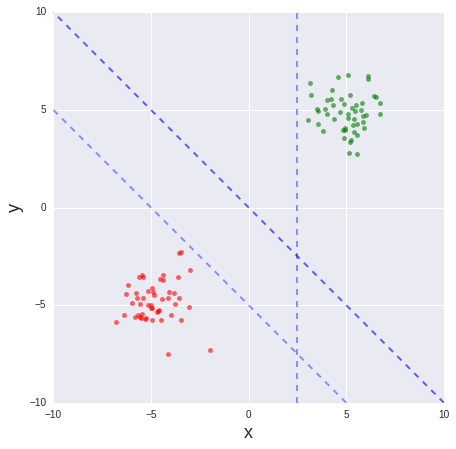

In [110]:
plt.figure(figsize=(7,7))
plt.scatter(x1, y1, color = 'g', alpha = 0.6)
plt.scatter(x2, y2, color = 'r', alpha = 0.6)
plt.plot([10, -10], [-10, 10], color='b', linestyle='--', linewidth=2, alpha = 0.6)
plt.plot([2.5, 2.5], [-10, 10], color='b', linestyle='--', linewidth=2, alpha = 0.4)
plt.plot([5, -10], [-10, 5], color='b', linestyle='--', linewidth=2, alpha = 0.4)

plt.xlim([-10,10])
plt.ylim([-10,10])

plt.xlabel("x", fontsize = 18)
plt.ylabel("y", fontsize = 18)

plt.show()

#### Q. Which of the lines is a better classifier? 

- If we consider the evaluation metrics alone, they are all equivalent
- However, the blue line _seems_ nicer! Why?

Because it is at a maximum possible distance from both classes!

## SVM: Objective

*Margin* : Smallest distance between a point and the decision surface. We would like to maximize this margin.  
<img src="files/svm_support_vectors.png" width="400px" align="left">

We need:

1. Distance of a point from a hyperplane
2. Constrained optimization

## 1. Distance of a point from a line

Distance of a point $(x_0, y_0)$ from a line $ax + by + c = 0$  is,

$$d = \frac{\left |\: ax_0 + by_0 + c \:\right |}{\sqrt{a^2 + b^2}}$$    

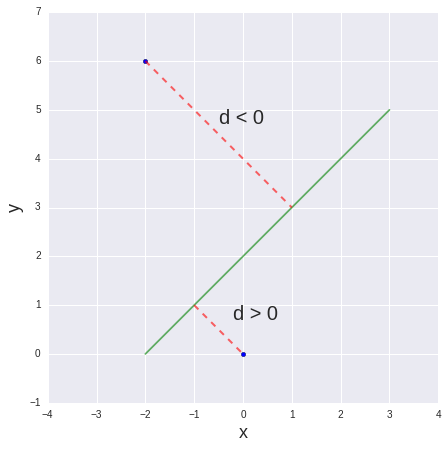

In [11]:
plt.figure(figsize=(7,7))
x1 = np.linspace(-2, 3)
y1 = x1 + 2 
plt.plot(x1, y1, color = 'g', alpha = 0.6)
plt.scatter(-2, 6)
plt.plot([-2, 1], [6, 3], color='r', linestyle='--', linewidth=2, alpha = 0.6)
plt.xlim([-4,4])
plt.text(-0.5, 4.7, "d < 0", size = 20)
plt.scatter(0, 0)
plt.plot([-1, 0], [1, 0], color='r', linestyle='--', linewidth=2, alpha = 0.6)
plt.text(-0.2, 0.7, "d > 0", size = 20)

plt.xlabel("x", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.show()

- Equation of line: x - y + 2 = 0  
- Distance of point (-2, 6) from this line is d = $\frac{-2 -6 + 2}{\sqrt{2}}$ = $-3\sqrt{2}$

- Distance of point (0,0) from this line is d = $+\sqrt{2}$

### 1b. Generalize to hyperplane

Equation of a hyperplane passing through a vector ${\bf x}$ is $w^T {\bf x} + w_0 = 0$

Signed distance of a point ${\bf x_1}$ from a plane 

$$ r = \frac{w^T {\bf x_1} + w_0} {\Vert w \Vert}$$

_______
## 2. Constrained Optimization

Consider the following optimization problem:

$$w^* = \underset{w}{\mathrm{arg \phantom{i} min}}\{f(w)\} $$
subject to constraints:
$$g_i(w) = 0\quad\quad i = 1,\dots,k$$
$$h_i(w) \le 0\quad\quad i = 1,\dots,l$$

### Lagrange Multiplier Overview

If we only have equality constraints, we minimize the Lagrangian 

$$ \mathcal{L}(w, \alpha) \equiv f({w}) + \sum_{i=1}^k\alpha_i g_i({w})$$

by solving for $w$ and $\alpha$:

$$  \quad \frac{\partial\mathcal{L}}{\partial w_i} = 0 \quad \text{and}\quad \frac{\partial\mathcal{L}}{\partial \alpha_i} = 0 $$


### Inequality Constraints: Lagrange Duality

When we have both, we write the Lagrangian,

$$ \mathcal{L}(w, \alpha, \beta) \equiv f({w}) + \sum_{i=1}^k\alpha_i g_i({w}) + \sum_{i=1}^l\beta_i h_i({w})$$

Consider the quantity

$$\theta_P(w) = \underset{\alpha,\beta : \beta \ge 0}{\mathrm{ max }} \phantom{a}\mathcal{L}(w, \alpha, \beta) $$ 

If $w$ satisfies all constraints, then $\theta_P(w) = f(w)$. If however any of the constraints is violated by $w$, then $\theta_P \rightarrow \infty$.  
Therefore, minimizing $\theta_P(w)$ gives the same solution as minimizing our original problem, also known as the *Primal* problem.

$$ \underset{w}{\mathrm{min}}\phantom{a} \theta_P(w) = \underset{w}{\mathrm{min}}\phantom{a}  \underset{\alpha,\beta : \beta \ge 0}{\mathrm{ max }} \phantom{a}\mathcal{L}(w, \alpha, \beta)  =  p^*$$ 

Now consider the quantity
$$\theta_D(\alpha, \beta) = \underset{w}{\mathrm{ min }} \phantom{a}\mathcal{L}(w, \alpha, \beta) $$

and corresponding *Dual Optimization Problem:*  

$$\underset{\alpha,\beta : \beta \ge 0}{\mathrm{ max }} \theta_D(\alpha, \beta) = \underset{\alpha,\beta : \beta \ge 0}{\mathrm{ max }} \phantom{a}\underset{w}{\mathrm{ min }}\phantom{a}\mathcal{L}(w, \alpha, \beta) = d^*$$ 

Relationship between Primal and Dual problem:

$$ d^* \le  p^* $$

#### Q. When does the equality hold?

### Karush-Kuhn-Tucker Conditions

If $f$ and $h_i$ are convex functions, and $g_i$ are affine, then there exist $w^*$, $\alpha^*$ and $\beta^*$, such that $w^*$ is the solution to the primal problem, and $\alpha^*$, $\beta^*$ are solutions to the dual problem, and

1. $\partial_{w_i} \mathcal{L}(w^*, \alpha^*, \beta^*) = 0$  
2. $\partial_{\alpha_i} \mathcal{L}(w^*, \alpha^*, \beta^*) = 0$  
3. $\beta_i h_i(w^*) = 0$  
4. $ h_i(w^*) \le 0$  
5. $ \alpha^*_i \ge 0$  

____

# SVM Problem Formulation

Given: Linearly separable data, $\mathcal{D} = \{({\bf x}_i, y_i)\}_{i=1}^n$, where ${\bf x}_i \in \mathcal{R}^k$ and $y_i \in \{-1, +1\}$

Find: a hyperplane $w^T {\bf x} + w_0 = 0$ such that the minimum distance of any point to the hyperplane is maximized.

$w^T {\bf x}_i + w_0 > 0 \quad and \quad  y_i > 0$   
$w^T {\bf x}_i + w_0 < 0 \quad and \quad  y_i < 0$  


$\implies (w^T {\bf x}_i + w_0)y_i > 0$ 


Find weights $w$ that maximise the *unsigned* distance 

$$ (w^*, w^*_0) = \underset{w, w_0}{\mathrm{arg \phantom{i} max}} 
\left\{\frac{1}{\lVert w\rVert} \underset{i}{\mathrm{min}} \left(y_i(w^T {\bf x}_i + w_0\right) \right\} $$

If we scale the weights, such that 
$$ \underset{i}{\mathrm{min}} \left(y_i(w^T {\bf x}_i + w_0)\right) = 1$$
then the problem reduces to maximizing 
$$ (w^*, w^*_0) = \underset{w, w_0}{\mathrm{arg \phantom{i} max}} 
\left\{\frac{1}{\lVert w\rVert} \right\} $$

or equivalently to minimizing
$$  (w^*, w^*_0) = \underset{w, w_0}{\mathrm{arg \phantom{i} min}} 
\left\{\lVert w\rVert^2 \right\} $$

subject to the constraint:
$$\boxed {\quad y_i(w^T {\bf x}_i + w_0) \ge 1 \quad \forall i \in {1,2,\dots, n}\quad}$$


## Dual Problem

#### We will solve the *Lagrangian Dual Problem* 
Eliminate $w, w_0$ to get Lagrangian $\mathcal{L}(w, w_0, \alpha)$ as a function of Lagrange multipliers: $\mathcal{L}(\alpha_i)$.

$\mathcal{L}(w, w_0, \alpha) = w^T w + \sum_{i=1}^n \alpha_i \left( y_i(w^T {\bf x}_i + w_0) - 1\right)$

- $\frac{\partial\mathcal{L}}{\partial w_j} = 2 w_j - \sum_{i = 1}^n \alpha_i y_i (x_i)_j 
= 0 \quad\quad\implies\quad\quad {\bf w} = \frac{1}{2} \sum_{i = 1}^n \alpha_i y_i {\bf x}_i $


- $\frac{\partial\mathcal{L}}{\partial w_0} = \sum_{i = 1}^n \alpha_i y_i = 0\quad\quad\quad$




Substituting back into the Lagrangian, we have

$$\mathcal{L}(w, w_0, \alpha_i) = w^Tw - \sum_i \alpha_i y_i w^T {\bf x}_i 
                                - \sum_i \alpha_i y_i w_0 + \sum_i \alpha_i $$
                                
$$\mathcal{L}(\alpha_i) = -\frac{1}{4}\sum_i \sum_j \alpha_i \alpha_j y_i y_j {\bf x}_i^T {\bf x}_j + \sum_i \alpha_i $$  

$$\phantom{aaaaaaaa} = -\frac{1}{4}\sum_i \sum_j \alpha_i \alpha_j y_i y_j\phantom{l} k ({\bf x}_i, {\bf x}_j) + \sum_i \alpha_i $$  

subject to the constraints
- $\alpha_i \ge 0$
- $\sum_{i=1}^n \alpha_i y_i = 0$

$k ({\bf x}_i, {\bf x}_j) = {\bf x}_i\cdot{\bf x}_j$ is a ${\bf kernel}$  
$k: \mathcal{R}^p \times \mathcal{R}^p \rightarrow \mathcal{R}$

#### Decision Boundary

The decision boundary is 

$$f({\bf x}) = w^T {\bf x} + w_0 \quad = \quad \frac{1}{2} \sum_{i=1}^n \alpha_i y_i x_i^T x + w_0$$ 
  
  
Consider the following KKT conditions:
- $\alpha_i > 0$
- $y_i (w^T {\bf x}_i + w_0) - 1 \ge 0 $
- $ \alpha_i (y_i (w^T {\bf x}_i + w_0) - 1) = 0$

These conditions imply that either $\alpha_i = 0$ or $y_i (w^T {\bf x}_i + w_0) = 1$.

But $y_i (w^T {\bf x}_i + w_0) = 1$ for only support vectors $\implies$ $\alpha_i \ne 0$  only for support vectors!

$$ \boxed {\quad f({\bf x}) = \frac{1}{2}\sum_{x_i=\mathcal{S}} \alpha_i y_i k(x_i, x) + w_0 \quad}$$ 

where $w_0 = y_i - w^T x_S \quad \text{and}\quad x_S \in \mathcal{S}. $

- Recall that $f({\bf x}) = 0$ is the decision boundary. 
- $f({\bf x}) > 0$ is one class, $f({\bf x}) < 0$ is the other. 
- For predicting class of a previously unseen point ${\bf x}_p$, we only need to compute its kernel with the support vectors. 

- SVM makes fast predictions, but slow to train!

Are we done? What about $\alpha_i$?

## Sequential Minimal Optimization 

- Algorithm for solving our Quadratic Programming problem
- Invented about 15 years ago, by John Platt at Microsoft Research.
- Used in scikit-learn implementation.
- Worst-case time complexity is $\mathcal{O}\left(n^3\right)$ where n is the size of training data.

_____

# Huge assumption so far: Data is linearly separable

- Q1. What if data is separable, but not linearly?
- Q2. What if data is not separable? 

<img src="files/radialdata.png" width=350 align="left">

<img src="files/unseparable_data_1.png" width=350 align="right">

## 1. What if data is separable, but not linearly?

#### Kernel Trick

Linearly separable in another space?  

Consider the transformed data points: 

$$x \rightarrow \phi(x)$$

Given a kernel that satifies:

$$k({\bf x}_i, {\bf x}_j) = \phi({\bf x}_i)\cdot\phi({\bf x}_j)$$

The decision surface can be written as

$$w = \sum_{i = 1}^n\alpha_i y_i \phi(x_i)$$

where $\alpha_i$ are obtained from the optimization problem:

$$\mathcal{L}(\alpha_i) = -\frac{1}{2}\sum_i \sum_j \alpha_i \alpha_j y_i y_j\phantom{l} \phi({\bf x}_i)^T \phi({\bf x}_j) + \sum_i \alpha_i$$

$$\phantom{aa}  = -\frac{1}{2}\sum_i \sum_j \alpha_i \alpha_j y_i y_j\phantom{l} k ({\bf x}_i, {\bf x}_j) + \sum_i \alpha_i$$

Therefore, instead of computing the transformation and then taking the inner products, we can simply compute the kernel with our original feature vectors. This is known as the _kernel trick_.



#### Some common kernels

- Linear kernel: $$K({\bf x}_i, {\bf x}_j) = {\bf x}_i^T {\bf x}_j$$
  
- Polynomial (degree *d*) kernel: $$K({\bf x}_i, {\bf x}_j) = ({\bf x}_i^T {\bf x}_j + c)^d$$ 
  
- Radial Basis Function (RBF) kernel: $$K({\bf x}_i, {\bf x}_j) = exp\left(-\gamma \Vert{\bf x}_i - {\bf x}_j\Vert^2\right)$$  
   
- Hyperbolic Tangent kernel: $$K({\bf x}_i, {\bf x}_j) = \mathrm{tanh}\left(\kappa\phantom{i}{\bf x}_i^T {\bf x}_j + c\right)$$

#### Decision boundaries for our separable (but not linearly) data   
   
<img src="files/kernels_nice.png" align="left" width=800>

## 2. What if data is not separable? 

#### Regularization!

Allow for misclassification by adding a penalty 

$\boxed { \quad (w^*, w^*_0) = \underset{w, w_0, \xi}{\mathrm{arg \phantom{i} min}} 
\left\{\frac{1}{2} w^T w + C \sum_{i=1}^n \xi_i \right\} \quad} $

with constraints:

- $y_i(w^T {\bf x}_i + w_0) \ge 1-\xi_i\quad\quad$ Points are now allowed to have a margin < 1
- $\xi_i \ge 0\quad\quad\quad\quad\quad\quad\quad\quad$ For each such point $x_i$, we pay a cost of $C\xi_i$

$C$ is the penalty parameter.


This penalty term also helps us reduce variance.
<img src="files/regularization.png" width="800px" align="left">

## Concluding Remarks

### The good things

- Fast predictions
- Solution is global and unique
- Can learn both linear and non-linear decision boundaries, RBF kernel most commonly used
- Not susceptible to outliers, not prone to overfitting compared to other methods
- Few tunable parameters - fewer parameters to search for

### The not-so-good things

- Computationally expensive - requires lots of memory and CPU time
- Slow to train
- No concept of probabilities, use other algorithms if probabilities are required

### Applications
- A not so up-to-date list of applications: http://www.clopinet.com/SVM.applications.html  

    - hand written digit classification (as good as neural nets)
    - text classification 
    - used extensively by scientists (classification of heartbeats, proteins)
    
- In finance (in combination with time series): http://www.svms.org/finance/

____


## Exercise Ideas:

Practical:

1. Play with a small dataset: try a variety of kernels and penalties. Plot the decision boundary.
2. Play with a few small datasets and compare SVM and Logistic Regression for
        a. linearly separable data
        b. appoximate linear separability i.e. some mingling between classes
        c. non-linearly separable data
        d. non-linearly non-separable data

Compare training and prediction time. 
Compare performance on test set using classification metrics.  

Theoretical: 

1. Derive the hypersurface with the penalty term included. 
2. Few optimization problems with inequality constraints. 